# Regression Week 3: Assessing Fit (polynomial regression)
### pandas sframes version  - Aug 16th

In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:
* Write a function to take an SArray and a degree and return an SFrame where each column is the SArray to a polynomial value up to the total degree e.g. degree = 3 then column 1 is the SArray column 2 is the SArray squared and column 3 is the SArray cubed
* Use matplotlib to visualize polynomial regressions
* Use matplotlib to visualize the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data

We will continue to use the House data from previous notebooks.

# Fire up graphlab create

In [2]:
import pandas as pd
import sframe as sf
import numpy as np

**1.** You’re going to write a function that adds powers of a feature to columns of a data frame. 

Write a polynomial function that takes an SArray and a maximal degree and returns an SFrame with columns containing the SArray to all the powers up to the maximal degree.

The easiest way to apply a power to an SArray is to use the .apply() and lambda x: functions. 
For example to take the example array and compute the third power we can do as follows: (note running this cell the first time may take longer than expected since it loads graphlab)

In [3]:
#creating a simple SArray/list or series containing items [1.0, 2.0, 3.0]
#only diff with series is an index is created by default, starting from 0

#tmp_gl = gl.SArray([1., 2., 3.])
tmp_sf = sf.SArray([1., 2., 3.])
tmp_pd = pd.Series([1., 2., 3.])

#tmp_gl_cube = tmp_gl.apply(lambda x: x**3)
tmp_sf_cube = tmp_sf.apply(lambda x: x**3)
tmp_pd_cube = tmp_pd.apply(lambda x: x**3)


#print "tmp_gl_cube", tmp_gl_cube
print "tmp_sf_cube", tmp_sf_cube
print "tmp_pd_cube\n", tmp_pd_cube


print "\nPandas series can be converted to SArrays"
pd_series = pd.Series([1,2,3,4,5])
sf_sarray = sf.SArray(pd_series)
print "\npd_series\n", pd_series
print "\nsf_sarray = ", sf_sarray

[INFO] sframe.cython.cy_server: SFrame v1.10 started. Logging /tmp/sframe_server_1472036978.log


tmp_sf_cube [1.0, 8.0, 27.0]
tmp_pd_cube
0     1.0
1     8.0
2    27.0
dtype: float64

Pandas series can be converted to SArrays

pd_series
0    1
1    2
2    3
3    4
4    5
dtype: int64

sf_sarray =  [1, 2, 3, 4, 5]


We can create an empty SFrame using SFrame() and then add any columns to it with ex_sframe['column_name'] = value. For example we create an empty SFrame and make the column 'power_1' to be the first power of tmp (i.e. tmp itself).

In [4]:
ex_sframe = sf.SFrame()
ex_sframe['power_1'] = tmp_sf
ex_sframe['power_2'] = tmp_sf.apply(lambda x: x**2)
ex_sframe['power_3'] = tmp_sf.apply(lambda x: x**3)
print ex_sframe

ex_pdframe = pd.DataFrame()
ex_pdframe['power_1'] = tmp_pd.apply(lambda x: x**1)
ex_pdframe['power_2'] = tmp_pd.apply(lambda x: x**2)
ex_pdframe['power_3'] = tmp_pd.apply(lambda x: x**3)
print ex_pdframe

+---------+---------+---------+
| power_1 | power_2 | power_3 |
+---------+---------+---------+
|   1.0   |   1.0   |   1.0   |
|   2.0   |   4.0   |   8.0   |
|   3.0   |   9.0   |   27.0  |
+---------+---------+---------+
[3 rows x 3 columns]

   power_1  power_2  power_3
0      1.0      1.0      1.0
1      2.0      4.0      8.0
2      3.0      9.0     27.0


# Polynomial_sframe function

**2.** Write your own function called ‘polynomial_sframe’ (or otherwise) which accepts an array ‘feature’ and a maximal ‘degree’ and returns an data frame (e.g. SFrame) with the first column equal to ‘feature’ and the remaining columns equal to ‘feature’ to increasing integer powers up to ‘degree’.
Using the hints above complete the following function to create an SFrame consisting of the powers of an SArray up to a specific degree:

In [5]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    
    # create and initialize a new empty SFrame:
    poly_sframe = sf.SFrame()
    
    # create a new column/feature 'power_1' and 
    # set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            
            # then assign poly_sframe[name] to the appropriate power of feature
            # poly_sframe[name] = feature.apply(lambda x: x**power)
            poly_sframe[name] = poly_sframe['power_1'].apply(lambda x: x**power)
            
    return poly_sframe  #returns the sframe created

In [6]:
def polynomial_dframe(feature, degree):
    # assume that degree >= 1
    
    # create and initialize a new pandas dataframe:
    # when using Pandas, feature is pandas.Series type
    poly_dframe = pd.DataFrame()
    
    #rest of code will be same
    
    # create a new column/feature 'power_1' and 
    # set poly_sframe['power_1'] equal to the passed feature
    poly_dframe['power_1'] = feature
    
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            
            # then assign poly_sframe[name] to the appropriate power of feature
            # poly_sframe[name] = feature.apply(lambda x: x**power)
            poly_dframe[name] = poly_dframe['power_1'].apply(lambda x: x**power)
            
    return poly_dframe  #returns the sframe created

To test your function consider the smaller tmp variable and what you would expect the outcome of the following call:

In [7]:
tmp = sf.SArray([1., 2., 3.])
print tmp
poly_sframe = polynomial_sframe(tmp, 3)
print poly_sframe

[1.0, 2.0, 3.0]
+---------+---------+---------+
| power_1 | power_2 | power_3 |
+---------+---------+---------+
|   1.0   |   1.0   |   1.0   |
|   2.0   |   4.0   |   8.0   |
|   3.0   |   9.0   |   27.0  |
+---------+---------+---------+
[3 rows x 3 columns]



In [8]:
# You can convert the SFrame to pandas dataframes using the SFrames.to_dataframe() method 
# Note that Pandas is limited by the size of the memory.
pd_dataframe = poly_sframe.to_dataframe()
print pd_dataframe

   power_1  power_2  power_3
0      1.0      1.0      1.0
1      2.0      4.0      8.0
2      3.0      9.0     27.0


In [9]:
tmp = pd.Series([1., 2., 3.])
print tmp, "\n"
poly_dframe = polynomial_dframe(tmp, 3)
print poly_dframe

0    1.0
1    2.0
2    3.0
dtype: float64 

   power_1  power_2  power_3
0      1.0      1.0      1.0
1      2.0      4.0      8.0
2      3.0      9.0     27.0


In [10]:
# Pandas data frames can be converted to SFrames also - 
# just pass the dataframe in as parameter when creating/initilizing new SFrame
#pd_dataframe = pd.DataFrame({ 
#     'one' : pd.Series([1., 2., 3., 4.]),
#     'two' : pd.Series([5., 6., 7., 8.])})
sf_sframe = sf.SFrame(poly_dframe)
print sf_sframe

+---------+---------+---------+
| power_1 | power_2 | power_3 |
+---------+---------+---------+
|   1.0   |   1.0   |   1.0   |
|   2.0   |   4.0   |   8.0   |
|   3.0   |   9.0   |   27.0  |
+---------+---------+---------+
[3 rows x 3 columns]



# Visualizing polynomial regression

**3**. 
For the remainder of the assignment we will be working with the house Sales data as in the previous notebooks. Load in the data and also sort the sales SFrame by ‘sqft_living’. When we plot the fitted values we want to join them up in a line and this works best if the variable on the X-axis (which will be ‘sqft_living’) is sorted. For houses with identical square footage, we break the tie by their prices.

Then we will use matplotlib to visualize what a polynomial regression looks like on some real data.

In [57]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

# When using sframe with graphlab create
# sales_gl = gl.SFrame('../Week2/kc_house_data.gl/')

# if using sframes 
sales_sf = sf.SFrame.read_csv('../Week3/kc_house_data.csv', column_type_hints = dtype_dict)
print (sales_sf.num_rows(), len(sales_sf) )
print sales_sf.column_names()
print sales_sf.column_types()
print sales_sf.head(2)['sqft_living', 'price']

# if using Pandas
sales_pd = pd.read_csv('../Week3/kc_house_data.csv', dtype = dtype_dict)

Finished parsing file /mnt/win-data/shared/stats-R/ml_specialization/machine-learning-specialization/course-2/Week3/kc_house_data.csv

Parsing completed. Parsed 100 lines in 0.254771 secs.

Finished parsing file /mnt/win-data/shared/stats-R/ml_specialization/machine-learning-specialization/course-2/Week3/kc_house_data.csv

Parsing completed. Parsed 21613 lines in 0.053027 secs.

(21613, 21613)
['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
[<type 'str'>, <type 'str'>, <type 'float'>, <type 'float'>, <type 'float'>, <type 'float'>, <type 'int'>, <type 'str'>, <type 'int'>, <type 'int'>, <type 'int'>, <type 'int'>, <type 'int'>, <type 'int'>, <type 'int'>, <type 'int'>, <type 'str'>, <type 'float'>, <type 'float'>, <type 'float'>, <type 'float'>]
+-------------+----------+
| sqft_living |  price   |
+-------------+----------+
|    1180.0   | 221900.0 |
|    2570.0   | 538000.0 |
+-------------+----------+
[2 rows x 2 columns]



As in Week 3, we will use the sqft_living variable. For plotting purposes (connecting the dots), you'll need to sort by the values of sqft_living. For houses with identical square footage, we break the tie by their prices.

In [12]:
sales_sf.head(2)

Columns:
	id	str
	date	str
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 2

Data:
+------------+-----------------+----------+----------+-----------+-------------+
|     id     |       date      |  price   | bedrooms | bathrooms | sqft_living |
+------------+-----------------+----------+----------+-----------+-------------+
| 7129300520 | 20141013T000000 | 221900.0 |   3.0    |    1.0    |    1180.0   |
| 6414100192 | 20141209T000000 | 538000.0 |   3.0    |    2.25   |    2570.0   |
+------------+-----------------+----------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5650   |   1    |     0      |  0   |     3     |   7   |    1180    |       0       |
|   7242   |   2    |     0      |  0   |     3     |   7   |    2170    |      400      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+---------+----------+---------------+-----+
| yr_built | yr_renovated | zipcode |   lat   |   long   | sqft_living15 | ... |
+----------+--------------+---------+---------+----------+---------------+-----+
|   1955   |      0       |  98178  | 47.5112 | -122.257 |     1340.0    | ... |
|   1951   |     1991     |  98125  |  47.721 | -122.319 |     1690.0    | ... |
+----------+--------------+---------+---------+----------+---------------+-----+
[2 rows x 21 columns]

In [58]:
sales_sf = sales_sf.sort(['sqft_living', 'price'])
sales_pd = sales_sf.sort(['sqft_living', 'price'])

print sales_pd.head(5)['sqft_living', 'price']

+-------------+----------+
| sqft_living |  price   |
+-------------+----------+
|    290.0    | 142000.0 |
|    370.0    | 276000.0 |
|    380.0    | 245000.0 |
|    384.0    | 265000.0 |
|    390.0    | 228000.0 |
+-------------+----------+
[5 rows x 2 columns]



**4.** Make a 1 degree polynomial SFrame with sales[‘sqft_living’] as the the feature. Call it ‘poly1_data’.

**5.** Add sales[‘price’] to poly1_data as this will be our output variable. e.g. if you’re using SFrames

Let's start with a degree 1 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like. 

In [60]:
poly1_data = polynomial_dframe(sales_sf['sqft_living'], 1)

# extract list of features or column names
poly1_data_sf = polynomial_sframe(sales_sf['sqft_living'], 1)
features = poly1_data_sf.column_names() 
print "features as sf sarray\n", features

my_features = pd.Series(features)
print "features as pd series\n", my_features

features = poly1_data.columns
print "features as pd.columns, don't worry about unicode chars!!\n", features

poly1_data['price'] = sales_pd['price'] # adds extra column for price to the data since it's the target
print poly1_data.head(1)

features as sf sarray
['power_1']
features as pd series
0    power_1
dtype: object
features as pd.columns, don't worry about unicode chars!!
Index([u'power_1'], dtype='object')
   power_1     price
0    290.0  142000.0


**6.** Use graphlab.linear_regression.create (or another linear regression library) to compute the regression weights for predicting sales[‘price’] based on the 1 degree polynomial feature ‘sqft_living’. The result should be an intercept and slope. e.g if you’re using graphlab create:


NOTE: for all the models in this notebook use validation_set = None to ensure that all results are consistent across users. This way you will get the same answer every time you run the code.

In [61]:
# We wont use graphlab but scikit_learn regression modelling capabilities
# First we have to convert sframes to a pandas dframe, cause scikit uses pandas dataframes
# poly1_df = poly1_data.to_dataframe()  -- we already have a pandas dataframe

poly1_df = poly1_data
print poly1_df.head(2)
print poly1_df.shape    #shows (21613, 2)  so 21613 rows and 2 columns power_1 and price
poly1_df.columns        #we can train model using only columns as features, but not price!


   power_1     price
0    290.0  142000.0
1    370.0  276000.0
(21613, 2)


Index([u'power_1', u'price'], dtype='object')

In [62]:
# select a Series from the DataFrame to be the output/target or response column
y = poly1_df['price']

# equivalent command that works if there are no spaces in the column name
y = poly1_df.price

# print the first 5 values
print "Response sales price = \n", y.head()

# check the type and shape of y
print "\ntype(y)", type(y)
print "y.shape", y.shape

# features = ['power_1']
# recall this is same as features = poly1_data_sf.column_names() 
X = poly1_df[features]

# print the first 5 values
print "Predictors or features = sqft_living =\n", X.head()

Response sales price = 
0    142000.0
1    276000.0
2    245000.0
3    265000.0
4    228000.0
Name: price, dtype: float64

type(y) <class 'pandas.core.series.Series'>
y.shape (21613,)
Predictors or features = sqft_living =
   power_1
0    290.0
1    370.0
2    380.0
3    384.0
4    390.0


In [53]:
# we can also use sklearn to do random data splits
# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [63]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg1 = LinearRegression()

# fit the model to the training data (to learn the coefficients)
# linreg.fit(X_train, y_train)
linreg1.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
# print the intercept and coefficients
print linreg1.intercept_     #-43579 from gl linear regression toolkit
print linreg1.coef_          #280.6 

# pair the feature names with the coefficients
zip(features, linreg1.coef_)

-43580.7430945
[ 280.6235679]


[('power_1', 280.62356789744865)]

In [65]:
# make predictions using model, pass in the same X into linreg model
y_pred1 = linreg1.predict(X)

# calculate RMSE using scikit-learn
from sklearn import metrics
#import numpy as np
print np.sqrt(metrics.mean_squared_error(y, y_pred1))  #graphlab gives 261440.790724

261440.790301


**7.** Next use the produce a scatter plot of the training data (just square feet vs price) and add the fitted model. e.g. with matplotlib and SFrames:

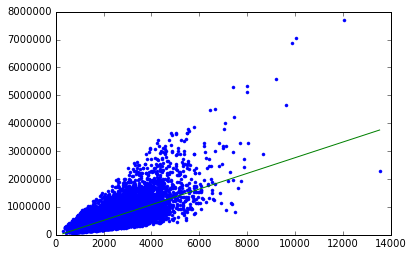

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(poly1_data['power_1'],poly1_data['price'], '.',
        poly1_data['power_1'], y_pred1,'-')         
# plt.plot(X,y, '.')   #this would do same scatter plot X ox x-axis, y on y-axis/vertical
# plot data points as '.'   and regression estimates as '-'. 
# Using '-' helps also visualize regression line

Let's unpack that plt.plot() command. The first pair of SArrays we passed are the 1st power of sqft and the actual price we then ask it to print these as dots '.'. The next pair we pass is the 1st power of sqft and the predicted values from the linear model. We ask these to be plotted as a line '-'. 

The resulting plot should look like a cloud of points with a straight line passing through.

We can see, not surprisingly, that the predicted values all fall on a line, specifically the one with slope 280 and intercept -43579. What if we wanted to plot a second degree polynomial?

**8.** Now that you have plotted the results using a 1st degree polynomial, try it again using a 2nd degree and 3rd degree polynomial. Look at the fitted lines, do they appear as you would expect?

In [67]:
poly2_data = polynomial_dframe(sales_pd['sqft_living'], 2)
my_features = poly2_data.columns # get the name of the features
print "My features are now this list", my_features
poly2_data['price'] = sales_pd['price'] # add price to the data since it's the target
print "Giving us this new sframe\n", poly2_data.head(2)

# However if we want to use scikit learn packages, the regression function needs X and y seperately
X = poly2_data[my_features]
y = poly2_data.price

print "\n new X with extra col for squared of sqft_living"
print X.head(2)
print "\n y unchanged - price"
print y.head(2)

My features are now this list Index([u'power_1', u'power_2'], dtype='object')
Giving us this new sframe
   power_1   power_2     price
0    290.0   84100.0  142000.0
1    370.0  136900.0  276000.0

 new X with extra col for squared of sqft_living
   power_1   power_2
0    290.0   84100.0
1    370.0  136900.0

 y unchanged - price
0    142000.0
1    276000.0
Name: price, dtype: float64


In [68]:
# fit the model to the training data (learn the coefficients)
# linreg.fit(X_train, y_train)
linreg2 = LinearRegression()
linreg2.fit(X, y)

# print the intercept and coefficients
print linreg2.intercept_     #199222.5 from gl linear regression toolkit
print linreg2.coef_          #67.99 and 0.038

199222.279305
[  6.79940947e+01   3.85812609e-02]


In [25]:
# pair the feature names with the coefficients
zip(my_features, linreg2.coef_)

[('power_1', 67.994094685793726), ('power_2', 0.038581260937201871)]

In [26]:
# make predictions using model
y_pred2 = linreg2.predict(X)

# calculate RMSE using scikit-learn  - Training-rmse from graphlab = 250948.368758
print np.sqrt(metrics.mean_squared_error(y, y_pred2))

250948.36762


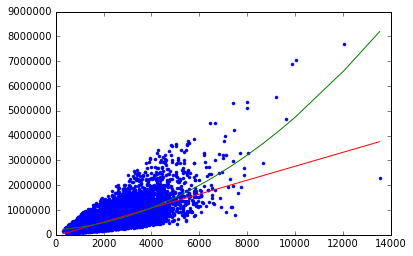

In [70]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
        poly1_data['power_1'], y_pred1,'r-', 
        poly1_data['power_1'], y_pred2,'g-')

The resulting model looks like half a parabola - the one plotted as a red line.  The green line is the regression line with the 2nd power of the feature. Lets try to see what the cubic looks like:

In [71]:
poly3_data = polynomial_dframe(sales_pd['sqft_living'], 3)
my_features = poly3_data.columns # get the name of the features
print "My features are now this list", my_features
poly3_data['price'] = sales_pd['price'] # add price to the data since it's the target
print "Giving us this new sframe\n", poly3_data.head(2)

X = poly3_data[my_features]
y = poly3_data.price

print "\n new X with extra col for squared of sqft_living"
print X.head(2)
print "\n y unchanged - price"
print y.head(2)

# fit the model to the training data (learn the coefficients)
# linreg.fit(X_train, y_train)
linreg3 = LinearRegression()
linreg3.fit(X, y)

# print the intercept and coefficients
print linreg3.intercept_     #199222.5 from gl linear regression toolkit
print linreg3.coef_          #67.99 and 0.038

My features are now this list Index([u'power_1', u'power_2', u'power_3'], dtype='object')
Giving us this new sframe
   power_1   power_2     power_3     price
0    290.0   84100.0  24389000.0  142000.0
1    370.0  136900.0  50653000.0  276000.0

 new X with extra col for squared of sqft_living
   power_1   power_2     power_3
0    290.0   84100.0  24389000.0
1    370.0  136900.0  50653000.0

 y unchanged - price
0    142000.0
1    276000.0
Name: price, dtype: float64
336819.748221
[ -9.01819864e+01   8.70465089e-02  -3.84055260e-06]


In [72]:
# pair the feature names with the coefficients
zip(my_features, linreg3.coef_)

'''  As given by graphlab
(intercept) 	336788.117952
power_1 		-90.1476236119
power_2 	 	0.087036715081
power_3 	 	-3.8398521196e-06
'''

'  As given by graphlab\n(intercept) \t336788.117952\npower_1 \t\t-90.1476236119\npower_2 \t \t0.087036715081\npower_3 \t \t-3.8398521196e-06\n'

In [73]:
# make predictions using model
y_pred3 = linreg3.predict(X)

# calculate RMSE using scikit-learn  - Training-rmse from graphlab =  249261.28
print np.sqrt(metrics.mean_squared_error(y, y_pred3))

249261.284986


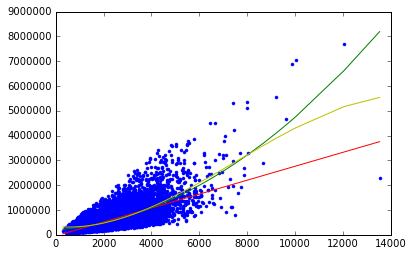

In [76]:
plt.plot(poly3_data['power_1'],poly3_data['price'],'.',
        poly1_data['power_1'], y_pred1,'r-', 
        poly2_data['power_1'], y_pred2,'g-',
        poly3_data['power_1'], y_pred3,'y-',)

**9.** Now try a 15th degree polynomial. Print out the coefficients and look at the resulted fitted line. Do you think this degree is appropriate for these data? If we were to use a different subset of the data do you think we would get pretty much the same curve?

In [81]:
poly15_data = polynomial_dframe(sales_pd['sqft_living'], 15)
my_features = poly15_data.columns # get the name of the features
#print "My features are now this list", my_features
poly15_data['price'] = sales_pd['price'] # add price to the data since it's the target
#print "Giving us this new sframe\n", poly15_data.head(2)

X = poly15_data[my_features]
y = poly15_data.price

print "\n new X with extra col for squared of sqft_living"
print X.head(1)
print "\n y unchanged - price"
print y.head(1)

# fit the model to the training data (learn the coefficients)
# linreg.fit(X_train, y_train)
linreg15 = LinearRegression()
linreg15.fit(X, y)

# print the intercept and coefficients
print linreg15.intercept_     #199222.5 from gl linear regression toolkit
print linreg15.coef_          #67.99 and 0.038


 new X with extra col for squared of sqft_living
   power_1  power_2     power_3       power_4       power_5       power_6  \
0    290.0  84100.0  24389000.0  7.072810e+09  2.051115e+12  5.948233e+14   

        power_7       power_8       power_9      power_10      power_11  \
0  1.724988e+17  5.002464e+19  1.450715e+22  4.207072e+24  1.220051e+27   

       power_12      power_13      power_14      power_15  
0  3.538148e+29  1.026063e+32  2.975582e+34  8.629189e+36  

 y unchanged - price
0    142000.0
Name: price, dtype: float64
537116.329638
[  4.56404164e-91   6.91713460e-51  -5.84668089e-56   2.78197775e-88
   1.19863929e-74   2.68575522e-71   2.26147568e-67   1.85900299e-63
   1.47144116e-59   1.09771012e-55   7.43509038e-52   4.23015578e-48
   1.61618577e-44  -2.49283826e-48   9.59718336e-53]


In [82]:
# pair the feature names with the coefficients
zip(my_features, linreg15.coef_)

[('power_1', 4.5640416449249861e-91),
 ('power_2', 6.9171345995561045e-51),
 ('power_3', -5.8466808901836489e-56),
 ('power_4', 2.7819777465757932e-88),
 ('power_5', 1.1986392947067809e-74),
 ('power_6', 2.6857552188992653e-71),
 ('power_7', 2.2614756826799232e-67),
 ('power_8', 1.8590029915832008e-63),
 ('power_9', 1.4714411550209987e-59),
 ('power_10', 1.0977101176268781e-55),
 ('power_11', 7.4350903821674144e-52),
 ('power_12', 4.2301557751215826e-48),
 ('power_13', 1.6161857728331358e-44),
 ('power_14', -2.4928382597799456e-48),
 ('power_15', 9.5971833609603959e-53)]

In [84]:
# make predictions using model
y_pred15 = linreg15.predict(X)

# calculate RMSE using scikit-learn  - Training-rmse from graphlab = 245690.511190
print np.sqrt(metrics.mean_squared_error(y, y_pred15))

350041.277869


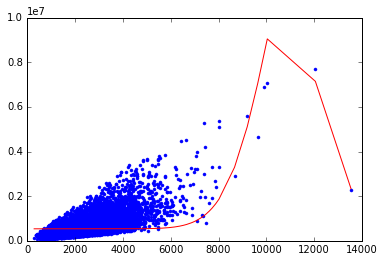

In [86]:
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
        #poly1_data['power_1'], y_pred1,'g-',
        poly15_data['power_1'], y_pred15,'r-')

* What do you think of the 15th degree polynomial?
Fits the data too hard - overfitting.

* Do you think this is appropriate? 
No, its not, even though this gives the lowest Training-rmse.

* If we were to change the data do you think you'd get pretty much the same curve? 
No, if we change the data, the curve will change, i.e model will change a lot - thus high variance between models by just changing a few data points. NOte bias will be low because generally a complex model, like a 15th order polynomial will overfit data, i.e RSS will be low.

# Changing the data and re-learning

**10.** We're going to split the sales data into four subsets of roughly equal size. Then you will estimate a 15th degree polynomial model on all four subsets of the data. Print the coefficients (you should use .print_rows(num_rows = 16) to view all of them) and plot the resulting fit (as we did above). The quiz will ask you some questions about these results.

To split the sales data into four subsets, we perform the following steps:
* First split sales into 2 subsets with `.random_split(0.5, seed=0)`. 
* Next split the resulting subsets into 2 more subsets each. Use `.random_split(0.5, seed=0)`.
* You should have 4 subsets of (approximately) equal size, call them set_1, set_2, set_3, and set_4

We set `seed=0` in these steps so that different users get consistent results.
You should end up with 4 subsets (`set_1`, `set_2`, `set_3`, `set_4`) of approximately equal size. If you’re not using SFrames then please download the provided csv files for each subset.

In [87]:
set_1 = pd.read_csv('../Week3/wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('../Week3/wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('../Week3/wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('../Week3/wk3_kc_house_set_4_data.csv', dtype=dtype_dict)
set_1.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,8658300340,20140523T000000,80000.0,1.0,0.75,430.0,5050,1,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200.0,7500.0
1,1352300580,20141114T000000,247000.0,1.0,1.00,460.0,4120,1,0,0,...,4,460,0,1937,0,98055,47.4868,-122.199,990.0,4120.0


**11.** Estimate a 15th degree polynomial on all 4 sets, plot the results and view the coefficients for all four models.
Fit a 15th degree polynomial on set_1, set_2, set_3, and set_4 using sqft_living to predict prices. Print the coefficients and make a plot of the resulting model.

In [88]:
poly_set1_data = polynomial_dframe(set_1['sqft_living'], 15)
features1 = poly_set1_data.columns
model_poly_set1= LinearRegression()
model_poly_set1.fit(poly_set1_data[features1], set_1['price'])
zip(features1, model_poly_set1.coef_)

[('power_1', 3.0579416791412512e-90),
 ('power_2', -1.6939494704143972e-49),
 ('power_3', -5.6176756842585691e-55),
 ('power_4', -4.9784122222889134e-60),
 ('power_5', 3.2308273614221704e-74),
 ('power_6', 1.1035833348665433e-70),
 ('power_7', 8.3772402886563895e-67),
 ('power_8', 6.2341195675377084e-63),
 ('power_9', 4.4915644242889343e-59),
 ('power_10', 3.0693876256690256e-55),
 ('power_11', 1.9174930010346414e-51),
 ('power_12', 1.0133517968523396e-47),
 ('power_13', 3.62176959054974e-44),
 ('power_14', -5.6350166080191139e-48),
 ('power_15', 2.1864111641754747e-52)]

In [89]:
poly_set2_data = polynomial_dframe(set_2['sqft_living'], 15)
features2 = poly_set2_data.columns
model_poly_set2= LinearRegression()
model_poly_set2.fit(poly_set2_data, set_2['price'])
zip(features2, model_poly_set2.coef_)

[('power_1', 2.7133594856639315e-77),
 ('power_2', 7.3354109038087181e-39),
 ('power_3', -1.8501481426983013e-44),
 ('power_4', 8.4462822230702599e-50),
 ('power_5', 5.7378617937677388e-71),
 ('power_6', 1.5193498713147913e-58),
 ('power_7', 3.6454961582664592e-55),
 ('power_8', 1.5041625757857547e-51),
 ('power_9', 5.7601566490117954e-48),
 ('power_10', 1.9577049735292163e-44),
 ('power_11', 5.3939653864372628e-41),
 ('power_12', 9.4037636037428543e-38),
 ('power_13', -3.6352914142105999e-41),
 ('power_14', 4.6547652381259511e-45),
 ('power_15', -1.9719912093194184e-49)]

In [90]:
poly_set3_data = polynomial_dframe(set_3['sqft_living'], 15)
features3 = poly_set3_data.columns
model_poly_set3= LinearRegression()
model_poly_set3.fit(poly_set3_data, set_3['price'])
zip(features3, model_poly_set3.coef_)

[('power_1', 2.8375193407185001e-88),
 ('power_2', -7.8022412831006037e-49),
 ('power_3', -1.3877084872480603e-55),
 ('power_4', -3.9827297778311307e-59),
 ('power_5', 1.5717016931002878e-72),
 ('power_6', 4.2789490761503488e-69),
 ('power_7', 2.680096260178185e-65),
 ('power_8', 1.6391136244795617e-61),
 ('power_9', 9.6643501496531161e-58),
 ('power_10', 5.3804465321667395e-54),
 ('power_11', 2.7256363612655613e-50),
 ('power_12', 1.1625324793673208e-46),
 ('power_13', 3.3375614134746299e-43),
 ('power_14', -6.7623881791320137e-47),
 ('power_15', 3.4313293205311174e-51)]

In [91]:
poly_set4_data = polynomial_dframe(set_4['sqft_living'], 15)
features4 = poly_set4_data.columns
model_poly_set4= LinearRegression()
model_poly_set4.fit(poly_set4_data, set_4['price'])
zip(features4, model_poly_set4.coef_)

[('power_1', 1.3711604987173929e-76),
 ('power_2', 2.7967822083709408e-40),
 ('power_3', -2.1306386258227746e-44),
 ('power_4', -2.1991071328637065e-49),
 ('power_5', 2.5842033695353443e-70),
 ('power_6', 5.2900249811749666e-58),
 ('power_7', 1.2707004611832174e-54),
 ('power_8', 4.878689722055742e-51),
 ('power_9', 1.7354902153004641e-47),
 ('power_10', 5.4705832008903687e-44),
 ('power_11', 1.3958759921218604e-40),
 ('power_12', 2.2504187100351063e-37),
 ('power_13', -9.4395411888380012e-41),
 ('power_14', 1.315730601662384e-44),
 ('power_15', -6.0916342992908582e-49)]

**Quiz Question: Is the sign (positive or negative) for power_15 the same in all four models?** No

signs for each of the models 1 to 4

[ 2.1, -1.9, 3.4, -6.1] 

[ 5.0, 1.6, 6.3, -4.7 ]  from graphlabs 

In [41]:
#zip(features1, model_poly_set1.coef_)
#zip(features2, model_poly_set2.coef_)
#zip(features3, model_poly_set3.coef_)
#zip(features4, model_poly_set4.coef_)
#model_split4.coefficients.print_rows(num_rows=16, num_columns=3)

**Quiz Question: (True/False) the plotted fitted lines look the same in all four plots**
No

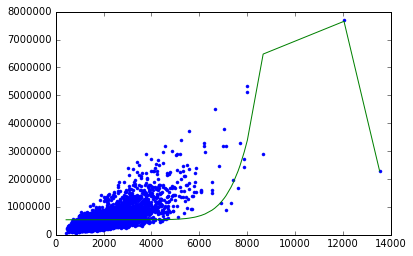

In [93]:
plt.plot(poly_set1_data['power_1'],set_1['price'],'.',
        poly_set1_data['power_1'], model_poly_set1.predict(poly_set1_data[features1]),'-')

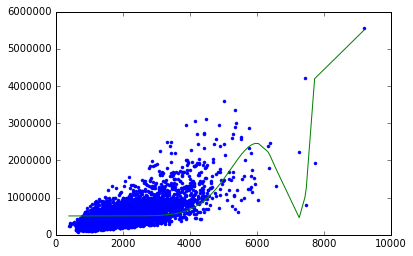

In [94]:
plt.plot(poly_set2_data['power_1'],set_2['price'],'.',
        poly_set2_data['power_1'], model_poly_set2.predict(poly_set2_data[features2]),'-')

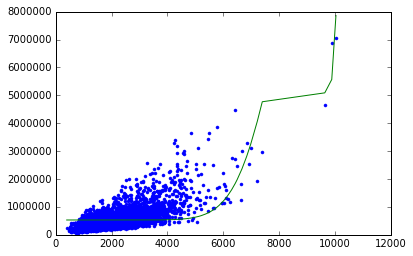

In [95]:
plt.plot(poly_set3_data['power_1'],set_3['price'],'.',
        poly_set3_data['power_1'], model_poly_set3.predict(poly_set3_data[features3]),'-')

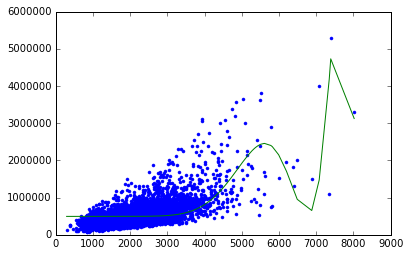

In [96]:
plt.plot(poly_set4_data['power_1'],set_4['price'],'.',
        poly_set4_data['power_1'], model_poly_set4.predict(poly_set4_data[features4]),'-')

The polynomial fit of degree 15 changed wildly whenever the data changed. In particular, when we split the sales data into four subsets and fit the model of degree 15, the result came out to be very different for each subset. **The model has *high variance***. We will see in next weeks lectures that ridge regression reduces such variance although with a tolerable increase in bias. We can say that a degree 15 polynomial model is complex model, increased complexity leads to more flexible model, i.e model that fits the data exceedingly well ie. overfit so bias is very low but as we saw from the plots of the 4 different degree 15 polynomial model fit to the data, the models that are defined by the weights or coefficients of the 15 features vary wildely thus displays high variance.


# Selecting a Polynomial Degree using Cross Validation

**14.** Since the “best” polynomial degree is unknown to us we will use cross validation to select the best degree. 

Whenever we have a "magic" parameter like the degree of the polynomial, there is one well-known way to select these parameters: validation set. (We will explore another approach in week 4).

We split the sales dataset 3-way into training set, test set, and validation set as follows:

* Split our sales data into 2 sets: `training_and_validation` and `testing`. Use `random_split(0.9, seed=1)`.
* Further split our training data into two sets: `training` and `validation`. Use `random_split(0.5, seed=1)`.

Again, we set `seed=1` to obtain consistent results for different users. If you’re not using SFrames then please download the provided csv files for training, validation and test data.

In [97]:
# 90% train/validate, testing 10% of data
#(training_and_validation,testing) = sales.random_split(0.9, seed=1)  

# further split train_validate into 50% train, 50% validation sets
#(training,validation) = training_and_validation.random_split(0.5, seed=1) 

training =   pd.read_csv('../Week3/wk3_kc_house_train_data.csv', dtype=dtype_dict)
validation = pd.read_csv('../Week3/wk3_kc_house_valid_data.csv', dtype=dtype_dict)
testing =    pd.read_csv('../Week3/wk3_kc_house_test_data.csv', dtype=dtype_dict)

Next you should write a loop that does the following:
* For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python type range(1, 15+1))
    * Build an SFrame of polynomial data of train_data['sqft_living'] at the current degree
    * hint: my_features = poly_data.column_names() gives you a list e.g. ['power_1', 'power_2', 'power_3'] which you might find useful for graphlab.linear_regression.create( features = my_features)
    * Add train_data['price'] to the polynomial SFrame
    * Learn a polynomial regression model to sqft vs price with that degree on TRAIN data
    * Compute the RSS on VALIDATION data (here you will want to use .predict()) for that degree and you will need to make a polynmial SFrame using validation data.
* Report which degree had the lowest RSS on validation data (remember python indexes from 0)

(Note you can turn off the print out of linear_regression.create() with verbose = False)

In [100]:
RSS = list()  #or =[]
min_rss = None
best_deg = None

for degree in range(1, 15+1):
    #print "Doing degree", degree,"polynomial"
    poly_data = polynomial_dframe( training['sqft_living'], degree )
    my_features = poly_data.columns # get the name of the features
    poly_data['price'] = training['price'] # add price to the data since it's the target
    
    # train the model using training data
    poly_model= LinearRegression()
    poly_model.fit( poly_data[my_features], poly_data['price'] ) 
    
    # make predictions using validation data
    validation_data = polynomial_dframe( validation['sqft_living'], degree )  
    validation_data['price'] = validation['price'] # add price to the data since it's the target
    predictions = poly_model.predict(validation_data[my_features])
    
    # residuals = actual outcome in validation set - predictions on validation set 
    residuals = validation['price'] - predictions
    rss = (residuals**2).sum()
    RSS.append(rss)
    
    print("Degree: %s, RSS: $%.6f" % (degree, rss))
    
    if min_rss is None or rss < min_rss:
        min_rss = rss
        best_deg = degree
    

Degree: 1, RSS: $629097886299587.500000
Degree: 2, RSS: $623955062706519.125000
Degree: 3, RSS: $625820280251530.625000
Degree: 4, RSS: $629987341468499.750000
Degree: 5, RSS: $628240679314405.875000
Degree: 6, RSS: $566268593930554.500000
Degree: 7, RSS: $1073845517537453.625000
Degree: 8, RSS: $7087872270340538.000000
Degree: 9, RSS: $45303601606652160.000000
Degree: 10, RSS: $247569911437529216.000000
Degree: 11, RSS: $1193782560132883968.000000
Degree: 12, RSS: $5092665343583419392.000000
Degree: 13, RSS: $761623002128430592.000000
Degree: 14, RSS: $2297560925006189568.000000
Degree: 15, RSS: $6955038097253948416.000000


In [101]:
print "Lowest RSS $%0.6f with polynomial of degree %d" %(min(RSS), RSS.index(min(RSS)) + 1)
best_degree = RSS.index(min(RSS)) + 1

Lowest RSS $566268593930554.500000 with polynomial of degree 6


**Quiz Question: Which degree (1, 2, …, 15) had the lowest RSS on Validation data?**

As we saw above, a degree 6 polynomial gives lowest RSS on validation data.

Now that you have chosen the degree of your polynomial using validation data, compute the RSS of **this** model on TEST data. Report the RSS on your quiz.

In [103]:
# 1st train using optimal degree on training data
poly_data = polynomial_dframe( training['sqft_living'], degree )
my_features = poly_data.columns # get the name of the features
poly_data['price'] = training['price'] # add price to the data since it's the target
#print poly_data.head(2)   

# train the model using training data
poly_model= LinearRegression()
poly_model.fit( poly_data[my_features], poly_data['price'] ) # make predictions using testing data

# create testing data using same degree polynomial as features - very potent!!!
testing_data = polynomial_dframe( testing['sqft_living'], degree ) 
testing_data.head(2)

# do predictions
predictions = poly_model.predict(testing_data[my_features])
    
# residuals = actual outcome in validation set - predictions on validation set 
residuals = testing['price'] - predictions
rss = (residuals**2).sum()
print rss                      #2.5290157284e+14  given by graphlab way of doing this

print metrics.mean_squared_error(testing['price'], predictions)  * len(predictions)
print "So RMSE is just square root of MSE = ", np.sqrt(metrics.mean_squared_error(testing['price'], predictions))

2.76693705523e+14
2.76693705523e+14
So RMSE is just square root of MSE =  353278.162808


metrics.mean_squared_error **MSE = rss/n**, so therefore **rss = MSE * n**

rmse given by graphlab = 255076.14 , about 100,000 smaller value!!! 

**Quiz Question: what is the RSS on TEST data for the model with the degree selected from Validation data?**  

2.76693705523e+14

5.66268593931e+14 - was the lowest RSS on validation data so test rss is even better